c:\GIS_Dev\envs\geo\Lib\site-packages\pyogrio\raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured LineString' is converted to 'LineString'
  return ogr_read(
c:\GIS_Dev\envs\geo\Lib\site-packages\pyogrio\geopandas.py:265: UserWarning: More than one layer found in 'Shapefiles': 'air003l' (default), 'air043l', 'air103l', 'air109l', 'air135l', 'air141l', 'air173l', 'air227l', 'air229l', 'air243l', 'air301l', 'air317l', 'air329l', 'air335l', 'air371l', 'air377l', 'air383l', 'air389l', 'air431l', 'air461l', 'air475l', 'air495l', 'cem003l', 'cem003p', 'cem043l', 'cem043p', 'cem103l', 'cem103p', 'cem109l', 'cem109p', 'cem135l', 'cem141l', 'cem141p', 'cem173l', 'cem173p', 'cem227l', 'cem227p', 'cem229l', 'cem229p', 'cem243l', 'cem243p', 'cem317l', 'cem317p', 'cem329l', 'cem329p', 'cem335l', 'cem335p', 'cem371l', 'cem371p', 'cem377l', 'cem377p', 'cem383l', 'cem383p', 'cem389l', 'cem389p', 'cem431l', 'cem431p', 'cem461l', 'cem461p', 'cem475l', 'cem475p

Shapefile load time: 0.74 seconds
GeoParquet load time: 7.57 seconds


c:\GIS_Dev\envs\geo\Lib\site-packages\contextily\tile.py:645: UserWarning: The inferred zoom level of 33 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


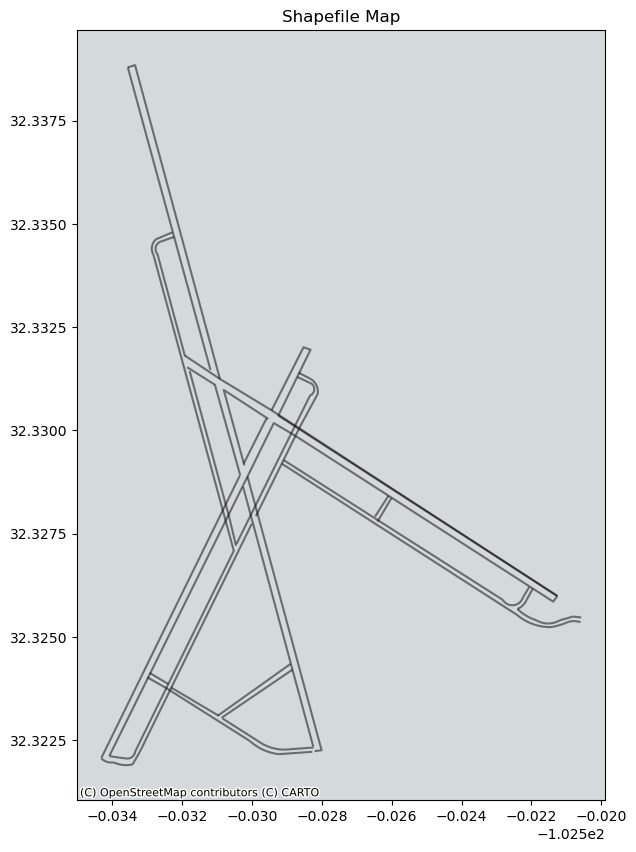

c:\GIS_Dev\envs\geo\Lib\site-packages\contextily\tile.py:645: UserWarning: The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


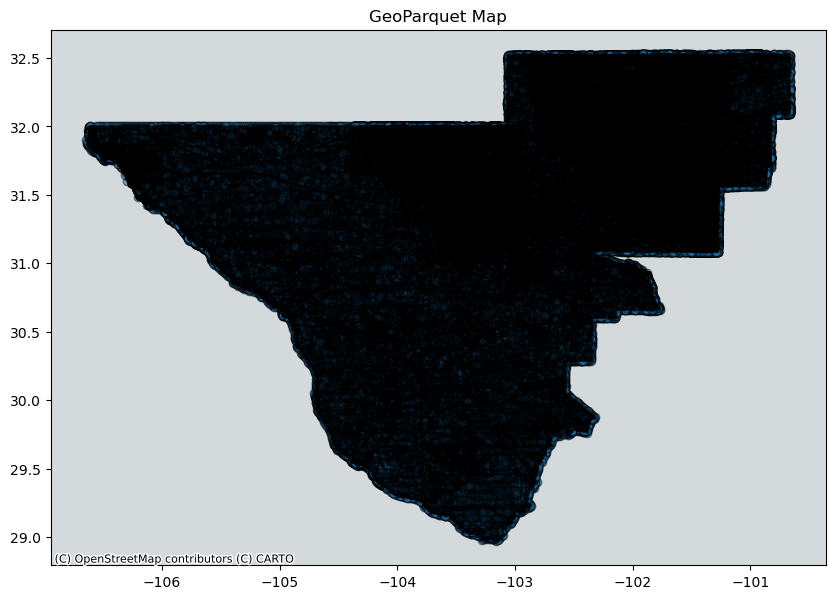

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import time

# Paths
shapefile_path = r"C:\GIS_Dev\Data\RRC_Data\Shapefiles"
geoparquet_path = r"C:\GIS_Dev\Data\RRC_Data\GeoParquet"

# --- Load Shapefile ---
start_shp = time.time()
gdf_shp = gpd.read_file(shapefile_path)
end_shp = time.time()
shp_load_time = end_shp - start_shp

# --- Load GeoParquet ---
start_parquet = time.time()
gdf_parquet = gpd.read_parquet(geoparquet_path)
end_parquet = time.time()
parquet_load_time = end_parquet - start_parquet

print(f"Shapefile load time: {shp_load_time:.2f} seconds")
print(f"GeoParquet load time: {parquet_load_time:.2f} seconds")

# --- Plot Shapefile ---
fig, ax = plt.subplots(figsize=(10, 10))
gdf_shp.to_crs(epsg=4326).plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_title("Shapefile Map")
plt.show()

# --- Plot GeoParquet ---
fig, ax = plt.subplots(figsize=(10, 10))
gdf_parquet.to_crs(epsg=4326).plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
ax.set_title("GeoParquet Map")
plt.show()